### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### *Solutions for the MovieLens Project Questions*
#### *Author: Varun Kulkarni (kulkarnivarun@outlook.com)*
#### GitHub Repo: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-varunkulkarni

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(color_codes=True) # add background to the graphs
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
ratings = pd.read_csv('Data.csv')
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
genres = pd.read_csv('item.csv')
genres.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
users = pd.read_csv('user.csv')
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
def print_details(data, transpose_desc=False):
    '''
    Method to display info, shape, description of the input data
    data - Pandas data frame
    '''
    # Display info of the data
    print("\nInfo:")
    data.info()
    
    # Display shape of the data
    print("\nShape: {0}".format(data.shape))
    
    # Display description - count, mean, std, quantiles, etc.
    print("\nDescription:")
    if transpose_desc:
        print(data.describe().T.to_string())
    else:
        print(data.describe().to_string())
    
    # Report number of missing values for this data frame
    print("\nNumber of missing values per attribute: \n{0}\n".format(data.isnull().sum()))
    print("\nTotal missing values: {0}".format(data.isnull().sum().sum()))

In [6]:
print("\n----------------------Ratings Data--------------\n")
print_details(ratings, True)


----------------------Ratings Data--------------


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Shape: (100000, 4)

Description:
              count          mean           std          min          25%          50%          75%          max
user id    100000.0  4.624848e+02  2.666144e+02          1.0        254.0        447.0        682.0        943.0
movie id   100000.0  4.255301e+02  3.307984e+02          1.0        175.0        322.0        631.0       1682.0
rating     100000.0  3.529860e+00  1.125674e+00          1.0          3.0          4.0          4.0          5.0
timestamp  100000.0  8.835289e+08  5.343856e+06  874724710.0  879448709.5  

In [7]:
print("\n----------------------Genre Data--------------\n")
print_details(genres, True)


----------------------Genre Data--------------


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int6

In [8]:
print("\n----------------------User data--------------\n")
print_details(users, True)


----------------------User data--------------


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

Shape: (943, 5)

Description:
         count        mean         std  min    25%    50%    75%    max
user id  943.0  472.000000  272.364951  1.0  236.5  472.0  707.5  943.0
age      943.0   34.051962   12.192740  7.0   25.0   31.0   43.0   73.0

Number of missing values per attribute: 
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


Total missing values: 0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [9]:
# Get columns / attributes representing genres
genre_cols = [col for col in genres.columns if col != 'movie id' and col != 'movie title' and col != 'release date']

# Get movies per genre
movies_per_genre = genres[genre_cols].sum()
mpg_df = pd.DataFrame({'Genre': movies_per_genre.index, 'Number Of Movies': movies_per_genre.values})
print("Number of Movies per genre:")
mpg_df

Number of Movies per genre:


,Genre,Number Of Movies
0,unknown,1
1,Action,251
2,Adventure,135
3,Animation,42
4,Childrens,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [10]:
# Create new column with sum of all genres per movie
col = 'total genres'
genres[col] = genres[genre_cols].sum(axis=1).values

# Filter movie titles with more than one genres
movies_mulitple_genres = genres[genres[col] > 1][['movie title', col]]

# Display movies with more than one genre
print("There are {0} movies with more than one genre. These movies are:\n".format(movies_mulitple_genres.shape[0]))
movies_mulitple_genres

There are 849 movies with more than one genre. These movies are:



,movie title,total genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


In [11]:
# If we actually want to display all the movies:
ans = movies_mulitple_genres['movie title'].values
for m1,m2,m3 in zip(ans[::3],ans[1::3],ans[2::3]):
    print ('{:<40}{:<40}{:<}'.format(m1,m2,m3))

Toy Story                               GoldenEye                               Get Shorty 
Copycat                                 Twelve Monkeys                          Babe 
Richard III                             Seven (Se7en)                           Usual Suspects, The 
Postino, Il                             French Twist (Gazon maudit)             From Dusk Till Dawn 
Angels and Insects                      Muppet Treasure Island                  Braveheart 
Taxi Driver                             Rumble in the Bronx                     Apollo 13 
Batman Forever                          Crimson Tide                            Desperado 
Doom Generation, The                    Free Willy 2: The Adventure Home        Mad Love 
Net, The                                Strange Days                            Disclosure 
Dolores Claiborne                       Eat Drink Man Woman                     Ed Wood 
I.Q.                                    Star Wars                          

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [12]:
# Get indexes of movies with Unknown genre
unknown_genre_idx = genres[genres['unknown'] == 1].index

# Drop rows with Unknown genre
genres.drop(unknown_genre_idx, inplace=True)

# Verify there are no movies with Unknown genre
genres[genres['unknown'] == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genres


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [13]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [14]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])
#similarly, the release year needs to be taken out from release date
#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat
#print(a[10:])
#print(a[-5:])

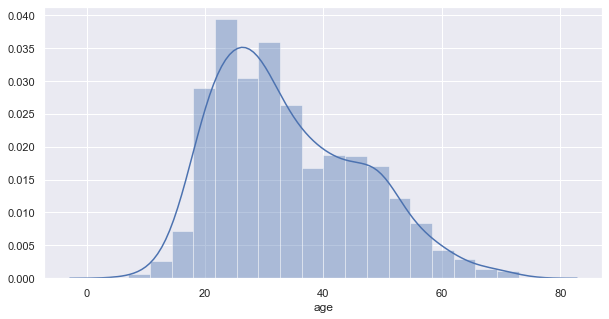

In [15]:
# Distplot for age
plt.figure(figsize=(10,5))
sns.distplot(users['age'])
plt.show()

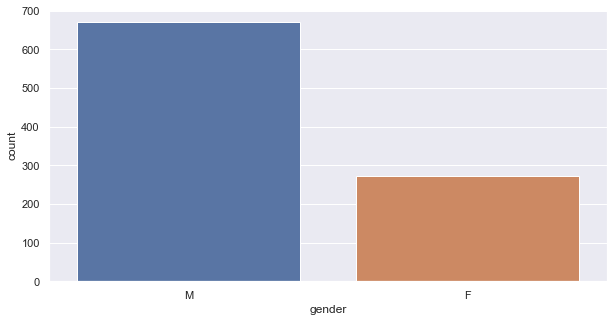

In [16]:
# Countplot for gender
plt.figure(figsize=(10,5))
sns.countplot(users['gender'])
plt.show()

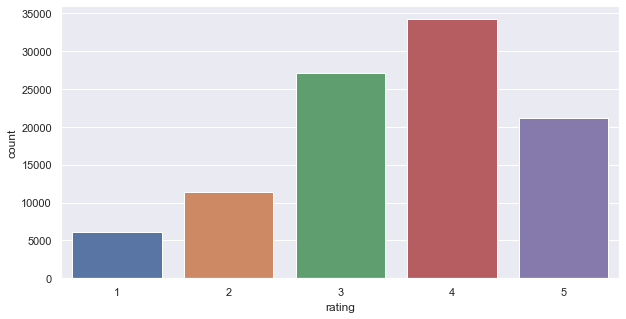

In [17]:
# Countplopt for ratings
plt.figure(figsize=(10,5))
sns.countplot(ratings['rating'])
plt.show()

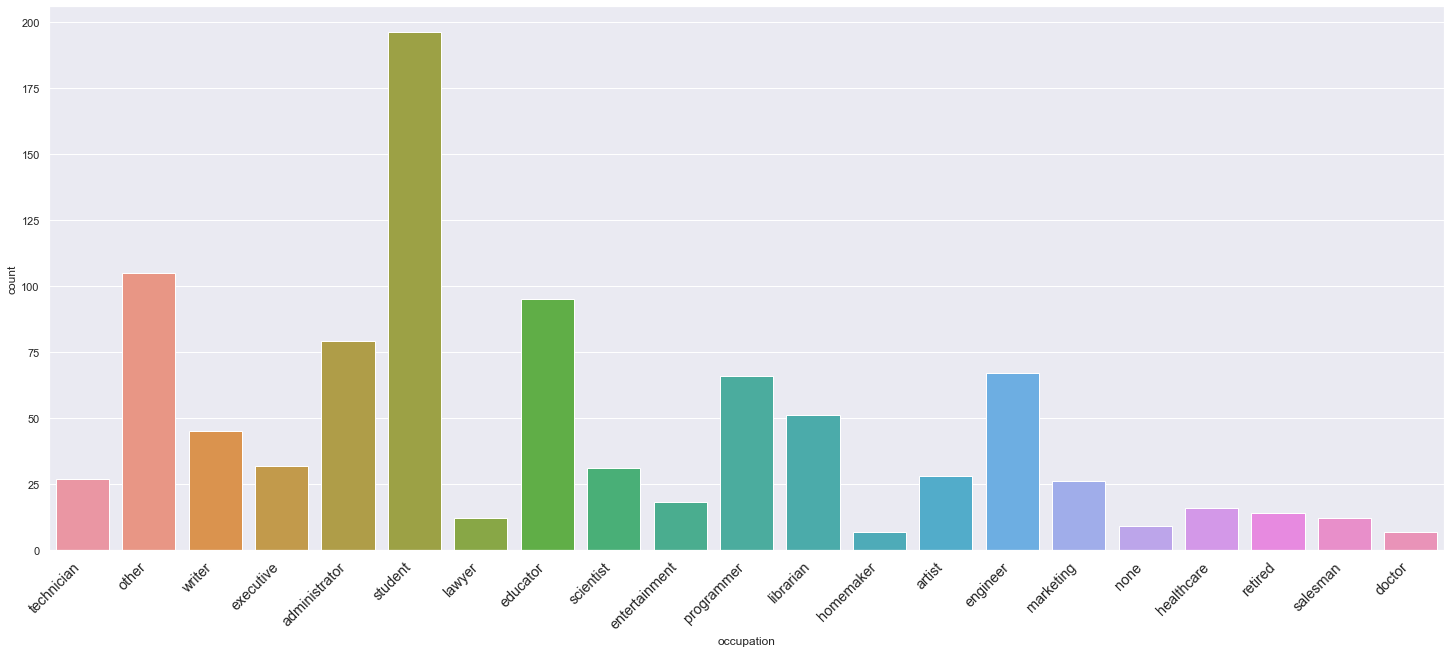

In [18]:
# Countplot for occupation
plt.figure(figsize=(25,10))
ocp_chart = sns.countplot(users['occupation'])
ocp_chart.set_xticklabels(
    ocp_chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.show()

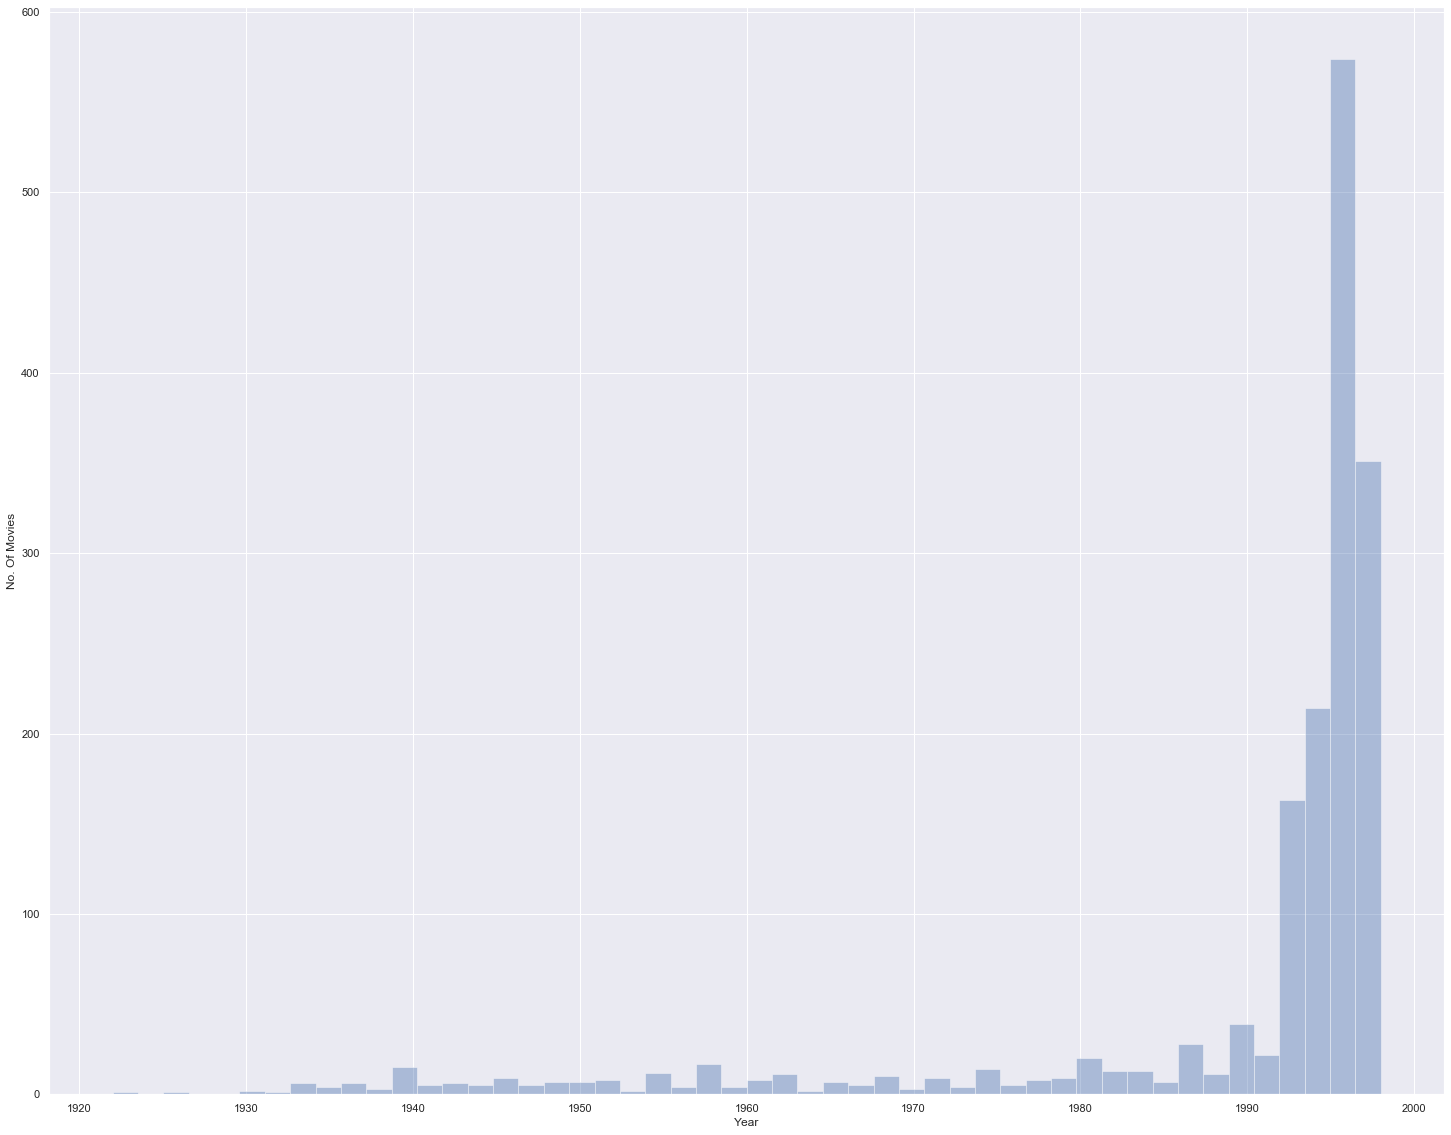

In [19]:
# Get release years from release date
release_years = [int(y.split('-')[2]) for y in genres['release date'].values]
assert len(release_years) == len(genres['release date'].values)

# Add column 'release year' to genres
genres['release year'] = release_years

# Distribution plot for release year without KDE
plt.figure(figsize=(25, 20))
release_year_dist = sns.distplot(genres['release year'], kde=False);
release_year_dist.set(xlabel='Year', ylabel='No. Of Movies')
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
# Get columns only for genres
skip_cols = set(['movie id', 'movie title', 'unknown', 'release date', 'release year', 'total genres'])
genre_cols = [col for col in genres.columns if col not in skip_cols]

# Get movies released per year, per genre.
popularity = genres[genre_cols].groupby(genres['release year']).sum()

# View and verify we have got the data correct
popularity.tail()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1998,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0


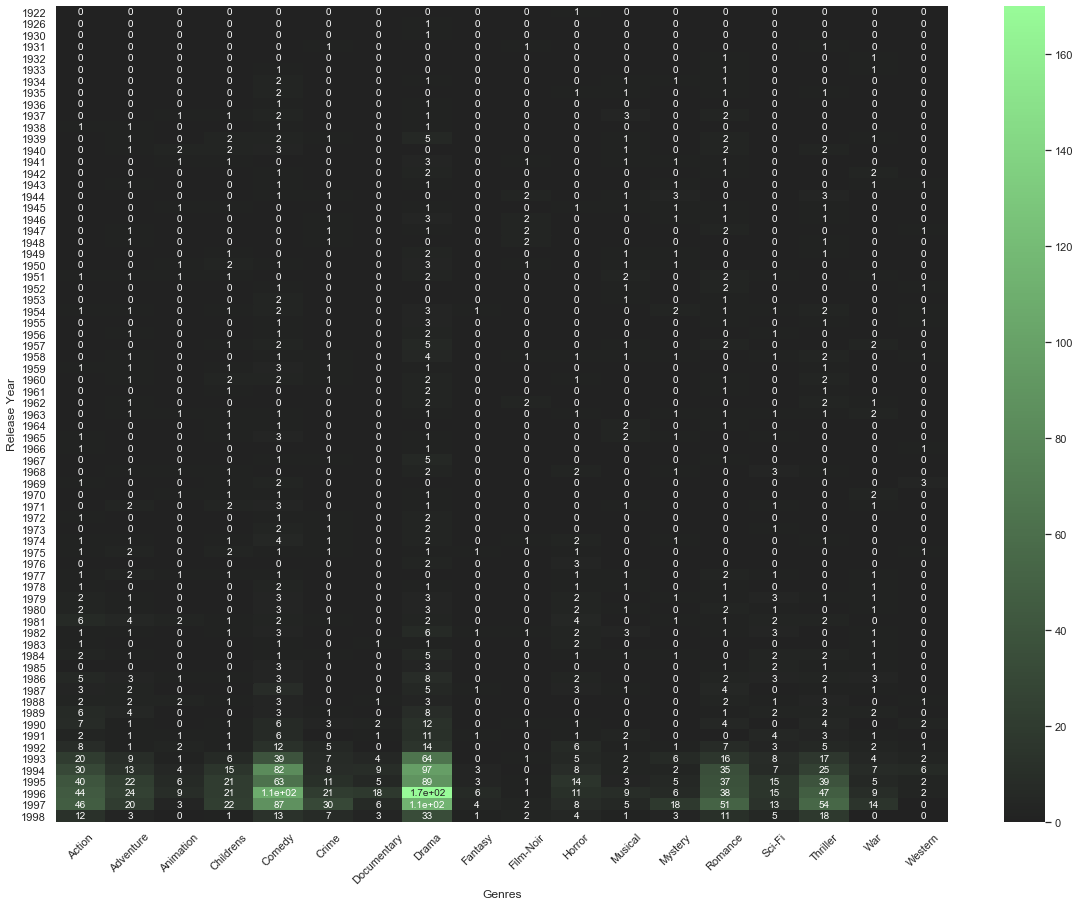

In [21]:
# Show heat map to visualize how popularity of genres has changed over the years
plt.figure(figsize=(20,15))
pal = sns.dark_palette("palegreen", as_cmap=True)
pop_hmap = sns.heatmap(popularity, annot=True, cmap=pal)
pop_hmap.set(xlabel='Genres', ylabel='Release Year')
pop_hmap.set_xticklabels(pop_hmap.get_xticklabels(), rotation=45)
plt.show()

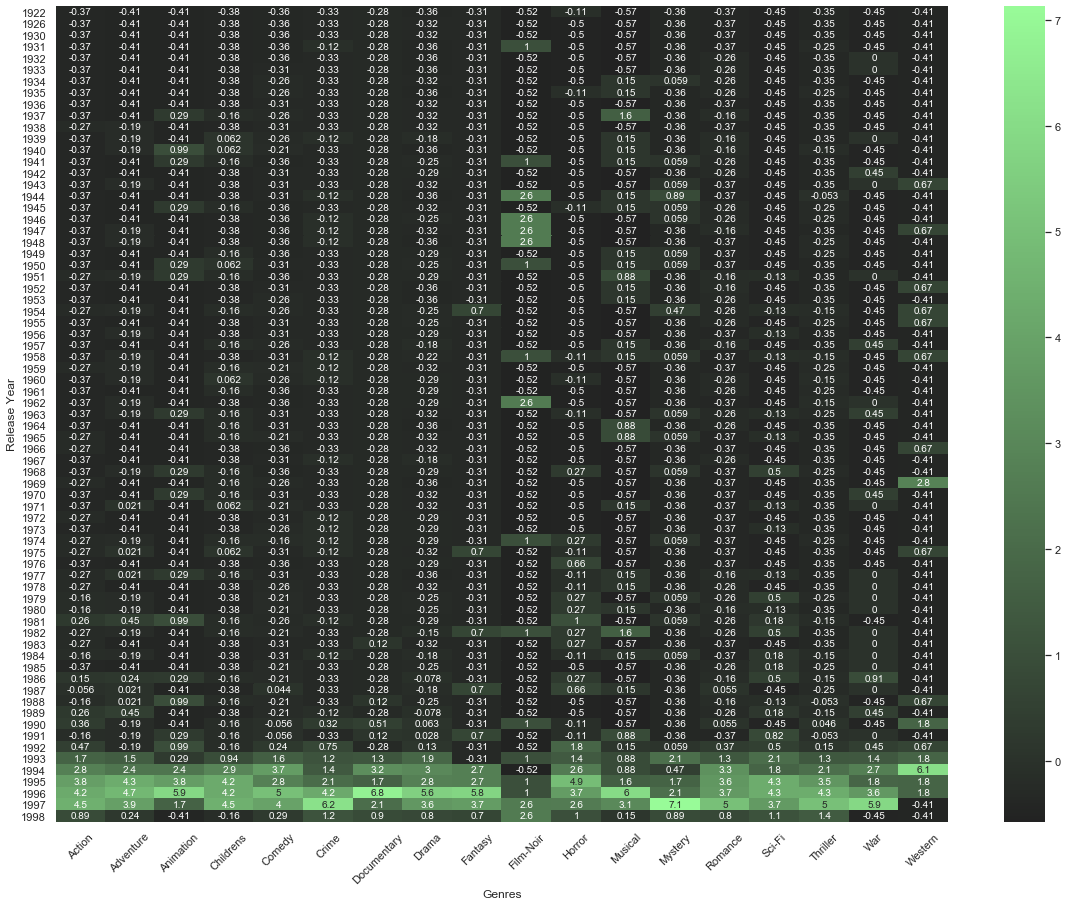

In [22]:
# Show heat map to visualize how popularity of genres has changed over the years, using z-score
plt.figure(figsize=(20,15))
pal = sns.dark_palette("palegreen", as_cmap=True)

# Here I use Z-scores to get a better range of data for the heatmap
pop_hmap = sns.heatmap(popularity.apply(stats.zscore), annot=True, cmap=pal)
pop_hmap.set(xlabel='Genres', ylabel='Release Year')
pop_hmap.set_xticklabels(pop_hmap.get_xticklabels(), rotation=45)
plt.show()

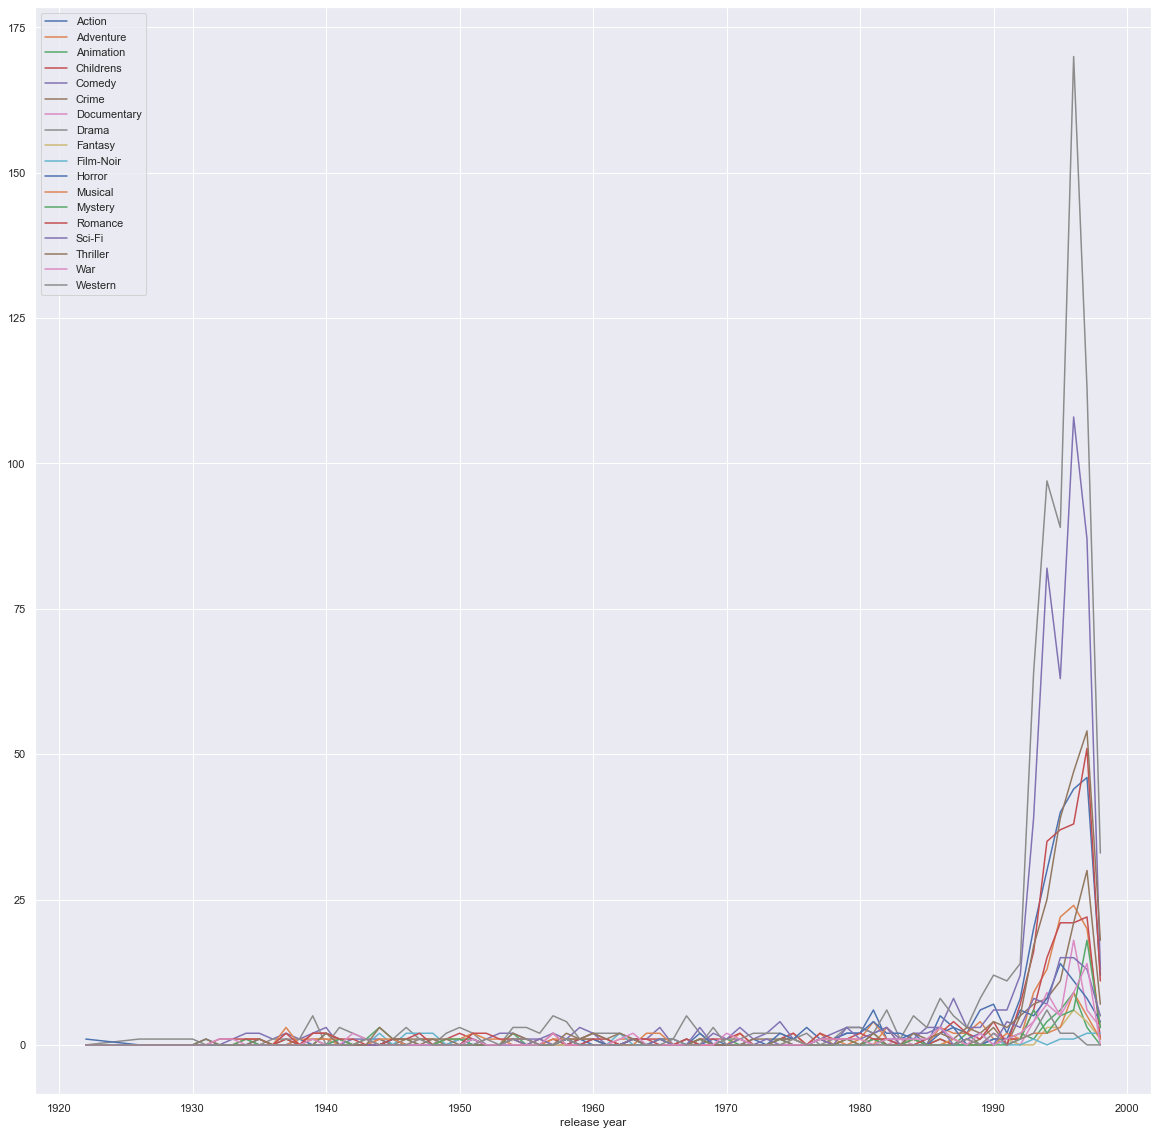

In [23]:
# We can use the line plot, to observe the popularity of genres over years
popularity.plot(figsize=(20,20));

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [24]:
# Find number of ratings per movie Id
total_ratings = ratings['rating'].groupby(ratings['movie id']).count()

# Find average rating per movie id
avg_ratings = ratings['rating'].groupby(ratings['movie id']).mean()

# Create a dataframe with movie Ids, number of ratings and average rating for each movie
movies_ratings_df = pd.DataFrame({'movie id': total_ratings.index, 
                                  '# ratings': total_ratings.values, 
                                  'avg. rating': avg_ratings.values})

# Get the movies that have more then 100 ratings
movies_ratings_df = movies_ratings_df[movies_ratings_df['# ratings'] > 100]

# Get movie titles from genre_data for movie ids with more than 100 ratings.
movie_cols = ['movie id', '# ratings', 'avg. rating', 'movie title']
merged_movies_df = pd.merge(movies_ratings_df, genres, how='inner', on='movie id')[movie_cols]

# Sort movies based on average rating in descending order
merged_movies_df.sort_values(by='avg. rating', ascending=False, inplace=True)
answer = merged_movies_df[:25][['movie title','avg. rating', '# ratings']]

print("Top 25 movies according to average ratings such that each movie has number of ratings more than 100:")
print(answer.to_string(index=False))

Top 25 movies according to average ratings such that each movie has number of ratings more than 100:
                                                           movie title  avg. rating  # ratings
                                                       Close Shave, A      4.491071        112
                                                     Schindler's List      4.466443        298
                                                  Wrong Trousers, The      4.466102        118
                                                           Casablanca      4.456790        243
                                            Shawshank Redemption, The      4.445230        283
                                                          Rear Window      4.387560        209
                                                  Usual Suspects, The      4.385768        267
                                                            Star Wars      4.358491        583
                                            

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:
* Men watch more drama than women: False
* Women watch more Sci-Fi than men: False
* Men watch more Romance than women: False


In [25]:
def get_percent(genre='Drama', gender='F'):
    '''
    Method to calculate percent of given gender (male or female) watched certain genre
    
    genre - Movie genre such as Drama, Romance, Sci-Fi, etc.
    gender - M (male) or F (female)
    '''
    # Get ids for males / females based on given gender
    gender_ids = set(users[users['gender']==gender]['user id'].values)
    
    # Get movie ids based on given genre
    genre_movie_ids = set(genres[genres[genre] == 1]['movie id'].values)
    
    # Get total ratings by males / females
    total_gender_ratings = ratings[ratings['user id'].isin(gender_ids)].shape[0]
    
    # Get ratings for given genre and given gender
    genre_gender_ratings = ratings[ratings['user id'].isin(gender_ids) & 
                                   ratings['movie id'].isin(genre_movie_ids)].shape[0]
    
    # Return result rounded to two decimals
    return round(genre_gender_ratings / total_gender_ratings * 100.0, 2)


# Check validity of - "Men watch more drama than women"
men_watching_drama = get_percent(gender='M', genre='Drama')
women_watching_drama = get_percent(gender='F', genre='Drama')
# Display results - 
print("-------------------------------------")
print('Men watch more drama than women: ', men_watching_drama > women_watching_drama)
print('{0}% men watched drama, where as {1}% women watched drama'.format(men_watching_drama, women_watching_drama))

# Check validity of - "Women watch more Sci-Fi than men"
men_watching_sci_fi = get_percent(gender='M', genre='Sci-Fi')
women_watching_sci_fi = get_percent(gender='F', genre='Sci-Fi')
# Display results - 
print("-------------------------------------")
print('Women watch more Sci-Fi than men: ', women_watching_sci_fi > men_watching_sci_fi)
print('{0}% men watched sci-fi, where as {1}% women watched sci-fi'.format(men_watching_sci_fi, women_watching_sci_fi))

# Check validity of - "Men watch more Romance than women"
men_watching_romance = get_percent(gender='M', genre='Romance')
women_watching_romance = get_percent(gender='F', genre='Romance')
# Display results - 
print("-------------------------------------")
print('Men watch more romance than women: ', men_watching_romance > women_watching_romance)
print('{0}% men watched romance, where as {1}% women watched romance'.format(men_watching_romance, women_watching_romance))


-------------------------------------
Men watch more drama than women:  False
38.9% men watched drama, where as 42.77% women watched drama
-------------------------------------
Women watch more Sci-Fi than men:  False
13.6% men watched sci-fi, where as 10.21% women watched sci-fi
-------------------------------------
Men watch more romance than women:  False
18.32% men watched romance, where as 22.76% women watched romance
